In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
names = ['age', 'workclass', 'education', 'marital-status', 'occupation', 'race', 'sex', 'hours-per-week', 'native-country','income']
data = pd.read_csv('adult_train.csv', usecols=[0,1,3,5,6,8,9,12,13,14], names=names)

In [14]:
list(data)

['age',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'race',
 'sex',
 'hours-per-week',
 'native-country',
 'income']

In [15]:
data

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,<=50K
6,49,Private,9th,Married-spouse-absent,Other-service,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,White,Male,45,United-States,>50K
8,31,Private,Masters,Never-married,Prof-specialty,White,Female,50,United-States,>50K
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,40,United-States,>50K


In [4]:
no_rows = len(data.index)
print('Number of data points is',no_rows)

Number of data points is 32561


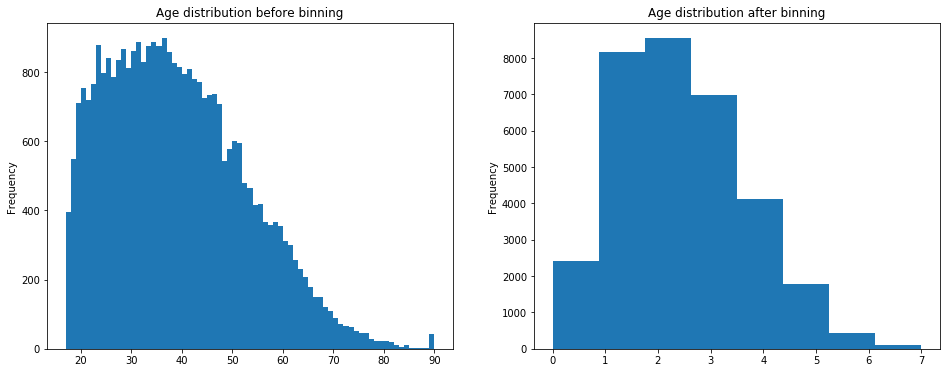

In [5]:
# Age before binning
f, ax = plt.subplots(1,2,figsize=(16,6))
data['age'].plot(kind='hist', bins=len(data['age'].value_counts()), title='Age distribution before binning', ax=ax[0])

# Bin
# 0-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
group_names = [0,1,2,3,4,5,6,7]
categories = pd.cut(data['age'], bins, labels=group_names)
data['age'] = pd.cut(data['age'], bins, labels=group_names)
# data['age']=data['age'].astype(float)
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data = data[~((data['age'].isnull()))]

# Age after binning
data['age'].plot(kind='hist', bins=len(data['age'].value_counts()), title='Age distribution after binning', ax=ax[1])
plt.show()

In [6]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

Deleted 0 rows


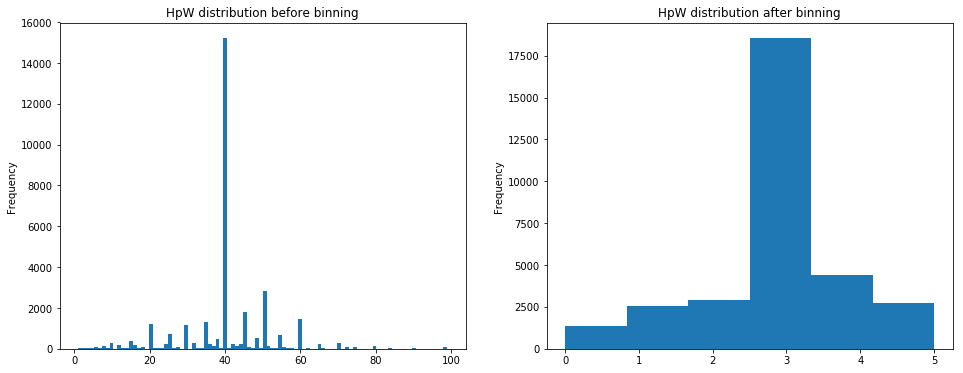

In [7]:
# HpW before binning
f, ax = plt.subplots(1,2,figsize=(16,6))
data['hours-per-week'].plot(kind='hist', bins=len(data['hours-per-week'].value_counts()), title='HpW distribution before binning', ax=ax[0])

# Bin
# 0-15,16-25,26-35,35-45,46-55,55-99 
bins = [0, 15, 25, 35, 45, 55, 99]
group_names = [0,1,2,3,4,5]
categories = pd.cut(data['hours-per-week'], bins, labels=group_names)
data['hours-per-week'] = pd.cut(data['hours-per-week'], bins, labels=group_names)
data['hours-per-week'] = pd.to_numeric(data['hours-per-week'], errors='coerce')
data = data[~((data['hours-per-week'].isnull()))]

# Age after binning
data['hours-per-week'].plot(kind='hist', bins=len(data['hours-per-week'].value_counts()), title='HpW distribution after binning', ax=ax[1])
plt.show()

In [8]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

Deleted 0 rows


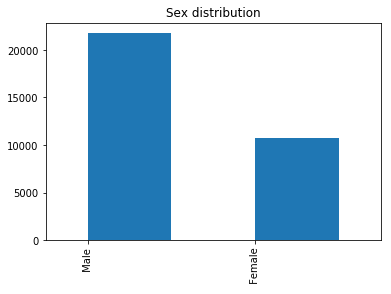

In [9]:
data['sex'].value_counts().plot(kind='bar', position=0,title='Sex distribution')

sex_dict = {"Male":0 , "Female":1}
data['sex'] = data['sex'].replace(sex_dict)
data['sex'] = pd.to_numeric(data['sex'], errors='coerce')
data = data[~((data['sex'].isnull()))]

plt.show()

In [10]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

Deleted 32561 rows


In [11]:
data['workclass']

Series([], Name: workclass, dtype: object)

In [12]:
data['workclass'].value_counts().plot(kind='bar', position=0,title='Workclass distribution')

# Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
workclass_dict = {"Private":0 , "Self-emp-not-inc":1, "Self-emp-inc":2, "Federal-gov":3,
                  "Local-gov":4,"State-gov":5,"Without-pay":6,"Never-worked":7}
data['workclass'] = data['workclass'].replace(workclass_dict)
data['workclass'] = pd.to_numeric(data['workclass'], errors='coerce')
data = data[~((data['workclass'].isnull()))]

plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

In [ ]:
data['marital-status'].value_counts().plot(kind='bar', position=0,title='Marital status distribution')

# Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
mar_dict = {"Married-civ-spouse":0 , "Divorced":1, "Never-married":2, "Separated":3,
            "Widowed":4, "Married-spouse-absent":5,"Married-AF-spouse":6}
data['marital-status'] = data['marital-status'].replace(mar_dict)
data['marital-status'] = pd.to_numeric(data['marital-status'], errors='coerce')
data = data[~((data['marital-status'].isnull()))]

plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

In [ ]:
data['race'].value_counts().plot(kind='bar', position=0,title='Race distribution')

# White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
race_dict = {"White":0 , "Asian-Pac-Islander":1,"Amer-Indian-Eskimo":2,"Other":3,"Black":4}
data['race'] = data['race'].replace(race_dict)
data['race'] = pd.to_numeric(data['race'], errors='coerce')
data = data[~((data['race'].isnull()))]

plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

In [ ]:
# HpW before binning
f, ax = plt.subplots(1,2,figsize=(16,6))
data['education'].value_counts().plot(kind='bar', position=0,title='Education distribution before binning', ax=ax[0])

# Education: Preschool - 8th, 9th-12th & HS-grad & assoc, Bachelors & some-college, Master, Prof-school, Doctorate
edu_dict = {"Bachelors":2 , "Some-college":2 , "11th":1 , "HS-grad":2 , "Prof-school":4 ,
            "Assoc-acdm":1 , "Assoc-voc":1 , "9th":1 , "7th-8th":0 , "12th":1 , "Masters":3 ,
            "1st-4th":0 , "10th":1 , "Doctorate":5 , "5th-6th":0 , "Preschool":0 }
data['education'] = data['education'].replace(edu_dict)
data['education'] = pd.to_numeric(data['education'], errors='coerce')
data = data[~((data['education'].isnull()))]

data['education'].value_counts().plot(kind='bar', position=0,title='Education distribution after binning', ax=ax[1])

plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

In [ ]:
# Country before binning
f, ax = plt.subplots(1,2,figsize=(16,6))
data['native-country'].value_counts().plot(kind='bar', position=0,title='Native country distribution before binning', ax=ax[0])

## Northamerica 0
# United-States, Outlying-US(Guam-USVI-etc), Canada

## Asia 1
# Cambodia, Thailand, Philippines, India, Japan,
# Taiwan, Laos, Iran, Vietnam, Hong, China

## Europe 2
# England, Germany, Yugoslavia, Hungary, Scotland,
# Portugal, Ireland, France, Italy, Poland, Greece,
# Holand-Netherlands

## Latin & Southamerica 3
# Puerto-Rico, Mexico, Dominican-Republic, Jamaica,
# Guatemala, Nicaragua, Haiti, Honduras, Cuba,
# Columbia, Ecuador, El-Salvador, Trinadad&Tobago,
# Peru, 

## Delete ?
# South 
# country_dict = {"United-States":0 , "Cambodia":1 , "England":2 , "Puerto-Rico":3 , "Canada":0 ,
#                 "Germany":2 , "Outlying-US(Guam-USVI-etc)":0 , "India":1 , "Japan":1 , "Greece":2 ,
#                 "South":'?' , "China":1 , "Cuba":3 , "Iran":1 , "Honduras":3 , "Philippines":1 ,
#                 "Italy":2 , "Poland":2 , "Jamaica":3 , "Vietnam":1 , "Mexico":3 , "Portugal":2 ,
#                 "Ireland":2 , "France":2 , "Dominican-Republic":3 , "Laos":1 , "Ecuador":3 ,
#                 "Taiwan":1 , "Haiti":3 , "Columbia":3 , "Hungary":2 , "Guatemala":3 ,
#                 "Nicaragua":3 , "Scotland":2 , "Thailand":1 , "Yugoslavia":2 , "El-Salvador":3 ,
#                 "Trinadad&Tobago":3 , "Peru":3 , "Hong":1 , "Holand-Netherlands":2}
country_dict = {"United-States":0 , "Cambodia":1 , "England":1 , "Puerto-Rico":1 , "Canada":1 ,
                "Germany":1 , "Outlying-US(Guam-USVI-etc)":1 , "India":1 , "Japan":1 , "Greece":1 ,
                "South":1 , "China":1 , "Cuba":1 , "Iran":1 , "Honduras":1 , "Philippines":1 ,
                "Italy":1 , "Poland":1 , "Jamaica":1 , "Vietnam":1 , "Mexico":1 , "Portugal":1 ,
                "Ireland":1 , "France":1 , "Dominican-Republic":1 , "Laos":1 , "Ecuador":1 ,
                "Taiwan":1 , "Haiti":1 , "Columbia":1 , "Hungary":1 , "Guatemala":1 ,
                "Nicaragua":1 , "Scotland":1 , "Thailand":1 , "Yugoslavia":1 , "El-Salvador":1 ,
                "Trinadad&Tobago":1 , "Peru":1 , "Hong":1 , "Holand-Netherlands":1}
data['native-country'] = data['native-country'].replace(country_dict)
data['native-country'] = pd.to_numeric(data['native-country'], errors='coerce')
data = data[~((data['native-country'].isnull()))]

data['native-country'].value_counts().plot(kind='bar', position=0,title='Native country distribution after binning', ax=ax[1])
plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

In [ ]:
# Occupation before binning
f, ax = plt.subplots(1,2,figsize=(16,6))
data['occupation'].value_counts().plot(kind='bar', position=0,title='Occuation distribution before binning', ax=ax[0])


## Grouping taken from https://rpubs.com/H_Zhu/235617

## White collar 0 
# Adm-clerical, Exec-managerial

## Blue collar 1
# Craft-repair, Farming-fishing, Handlers-cleaners, Machine-op-inspct, Transport-moving

## Service 2
# Other-service, Priv-house-serv, Protective-serv, Tech-support,

## Professional 3
# Prof-specialty 

## Armed-Forces 4
# Armed-Forces

## Sales 5
# Sales

occ_dict = {"Tech-support":2 , "Craft-repair":1 , "Other-service":2 , "Sales":5 ,
            "Exec-managerial":0 , "Prof-specialty":3 , "Handlers-cleaners":1 ,
            "Machine-op-inspct":1 , "Adm-clerical":0 , "Farming-fishing":1 ,
            "Transport-moving":1 , "Priv-house-serv":2 , "Protective-serv":2 ,
            "Armed-Forces":4}

data['occupation'] = data['occupation'].replace(occ_dict)
data['occupation'] = pd.to_numeric(data['occupation'], errors='coerce')
data = data[~((data['occupation'].isnull()))]

data['occupation'].value_counts().plot(kind='bar', position=0,title='Occuation distribution after binning', ax=ax[1])

plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

In [ ]:
data['income'].value_counts().plot(kind='bar', position=0,title='Income distribution')

income_dict = {"<=50K":0 , ">50K":1}
data['income'] = data['income'].replace(income_dict)
data['income'] = pd.to_numeric(data['income'], errors='coerce')
data = data[~((data['income'].isnull()))]

plt.show()

In [ ]:
print('Deleted',no_rows-len(data.index),'rows')
no_rows = len(data.index)

In [ ]:
data.to_csv('adult_cleaned.csv',sep=',', index=False)

In [ ]:
data = pd.read_csv('adult_cleaned.csv', sep=",")

In [ ]:
dct = {func.__name__:data.apply(func) for func in (pd.Series.nunique, pd.Series.count)}
print(pd.concat(dct, axis=1))